# Implementação PCA e Análise Multivariada

## Preparação

### Carregamento das Bibliotecas

In [3]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Carregamentos dos Dados

In [5]:
df = pd.read_csv("../dados/student_habits_performance.csv")


## Pré-PCA

### Variáveis Dummy

Precisamos transformar nossas variáveis categóricas, que observamos anteriormente no pré-processamento, em numéricas para que seja possível aplicar a Análise de Componente Principal.

In [4]:
#Todas as Colunas presentes no dataframe
print(df.columns)

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')


In [5]:
#Visualização dos primeiros elementos do dataframe
print(df.head())

  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average  

Agrupamos as variáveis categóricas numa lista para aplicar a função get_dummies do pandas, que tem como objetivo criar as variáveis dummy, substituindo os valores categóricos. Também garantimos que os valores substituídos sejam numéricos ao usar dtype = int

In [6]:
#o id do estudante é desconsiderado, já que não nos entrega informações relevantes
colunas_categoricas = [
    "gender",
    "part_time_job",
    "diet_quality",
    "parental_education_level",
    "internet_quality",
    "extracurricular_participation"
]


In [7]:
df_dummy = pd.get_dummies(df[colunas_categoricas], drop_first= False, dtype = int)
print(df_dummy.head())

   gender_Female  gender_Male  gender_Other  part_time_job_No  \
0              1            0             0                 1   
1              1            0             0                 1   
2              0            1             0                 1   
3              1            0             0                 1   
4              1            0             0                 1   

   part_time_job_Yes  diet_quality_Fair  diet_quality_Good  diet_quality_Poor  \
0                  0                  1                  0                  0   
1                  0                  0                  1                  0   
2                  0                  0                  0                  1   
3                  0                  0                  0                  1   
4                  0                  1                  0                  0   

   parental_education_level_Bachelor  parental_education_level_High School  \
0                                  0        

Com os valores substituídos por 0s e 1s em variáveis mais específicas, juntamos os valores numéricos e categóricos novamente ao dataframe.

In [8]:
colunas_numericas = [
    "age",
    "study_hours_per_day",
    "social_media_hours",
    "netflix_hours",
    "attendance_percentage",
    "sleep_hours",
    "exercise_frequency",
    "mental_health_rating",
    "exam_score"
]

In [9]:
df_final = pd.concat([df[colunas_numericas], df_dummy], axis = 1) # axis = 1 para agrupar por coluna
print(df_final.head())

   age  study_hours_per_day  social_media_hours  netflix_hours  \
0   23                  0.0                 1.2            1.1   
1   20                  6.9                 2.8            2.3   
2   21                  1.4                 3.1            1.3   
3   23                  1.0                 3.9            1.0   
4   19                  5.0                 4.4            0.5   

   attendance_percentage  sleep_hours  exercise_frequency  \
0                   85.0          8.0                   6   
1                   97.3          4.6                   6   
2                   94.8          8.0                   1   
3                   71.0          9.2                   4   
4                   90.9          4.9                   3   

   mental_health_rating  exam_score  gender_Female  ...  diet_quality_Good  \
0                     8        56.2              1  ...                  0   
1                     8       100.0              1  ...                  1   
2 

### Centering e Scaling

In [20]:
print('Médias:\n', df_final.mean())

Médias:
 age                                     20.4980
study_hours_per_day                      3.5501
social_media_hours                       2.5055
netflix_hours                            1.8197
attendance_percentage                   84.1317
sleep_hours                              6.4701
exercise_frequency                       3.0420
mental_health_rating                     5.4380
exam_score                              69.6015
gender_Female                            0.4810
gender_Male                              0.4770
gender_Other                             0.0420
part_time_job_No                         0.7850
part_time_job_Yes                        0.2150
diet_quality_Fair                        0.4370
diet_quality_Good                        0.3780
diet_quality_Poor                        0.1850
parental_education_level_Bachelor        0.3500
parental_education_level_High School     0.3920
parental_education_level_Master          0.1670
internet_quality_Average       

In [21]:
print(f'Desvio padrão: \n {df_final.std()}')

Desvio padrão: 
 age                                      2.308100
study_hours_per_day                      1.468890
social_media_hours                       1.172422
netflix_hours                            1.075118
attendance_percentage                    9.399246
sleep_hours                              1.226377
exercise_frequency                       2.025423
mental_health_rating                     2.847501
exam_score                              16.888564
gender_Female                            0.499889
gender_Male                              0.499721
gender_Other                             0.200690
part_time_job_No                         0.411028
part_time_job_Yes                        0.411028
diet_quality_Fair                        0.496263
diet_quality_Good                        0.485130
diet_quality_Poor                        0.388492
parental_education_level_Bachelor        0.477208
parental_education_level_High School     0.488441
parental_education_level_Master  

In [10]:
#centralização dos dados
df_central = df_final - df_final.mean()
#escalonamento
df_escal = df_central/df_final.std()
print(df_escal.head())

        age  study_hours_per_day  social_media_hours  netflix_hours  \
0  1.084009            -2.416859           -1.113507      -0.669415   
1 -0.215762             2.280566            0.251189       0.446742   
2  0.217495            -1.463758            0.507070      -0.483389   
3  1.084009            -1.736073            1.189418      -0.762428   
4 -0.649019             0.987072            1.615885      -1.227494   

   attendance_percentage  sleep_hours  exercise_frequency  \
0               0.092380     1.247496            1.460436   
1               1.400995    -1.524898            1.460436   
2               1.135017     1.247496           -1.008184   
3              -1.397101     2.225988            0.472988   
4               0.720090    -1.280275           -0.020736   

   mental_health_rating  exam_score  gender_Female  ...  diet_quality_Good  \
0              0.899736   -0.793525       1.038231  ...          -0.779172   
1              0.899736    1.799946       1.038231

## Matriz de Covariância e Autovetores/Autovalores

### Cálculo da Matriz de Covariância

In [11]:
mcov = np.cov(df_escal, rowvar = False) # aqui a escolha de usar numpy no lugar de df.cov() é para facilitar as operações com a matriz cov para calcular os autovetores/valores
print(mcov) # a saída é um n-dimensional array e não um dataframe

[[ 1.00000000e+00  3.97117909e-03 -9.15119924e-03 -1.17410395e-03
  -2.60552015e-02  3.74819156e-02 -3.83623585e-03 -4.51013606e-02
  -8.90687186e-03 -3.16994175e-02  2.55621263e-02  1.53085438e-02
   1.16803617e-02 -1.16803617e-02  9.93987759e-03 -2.00606263e-03
  -1.01922211e-02  3.24444371e-02 -4.63629973e-02 -4.84173769e-03
  -4.94949879e-02  2.99867285e-02  2.50871823e-02  4.99281817e-03
  -4.99281817e-03]
 [ 3.97117909e-03  1.00000000e+00  2.02823140e-02 -3.11583466e-02
   2.62641177e-02 -2.77571140e-02 -2.87011920e-02 -3.76782631e-03
   8.25418509e-01  2.20870509e-02 -2.56343720e-02  8.81438124e-03
   2.91328371e-02 -2.91328371e-02  5.57604802e-02 -3.56487497e-03
  -6.67773374e-02 -2.24700505e-02  6.42903292e-04  9.00917021e-03
   1.84401047e-02  1.51423000e-03 -2.64652647e-02  3.26420577e-03
  -3.26420577e-03]
 [-9.15119924e-03  2.02823140e-02  1.00000000e+00  1.14765638e-02
   4.04787925e-02  1.82362596e-02 -3.73190028e-02  1.49649069e-03
  -1.66732885e-01 -1.27328192e-03 -4.9

### Cálculos dos Autovetores e Autovalores

In [12]:
autovalores,autovetores = np.linalg.eig(mcov)
#Ordenamento dos autovalores - encontrar o autovalor de maior variância e seu autovetor associado (loadings do PC1)
idx = autovalores.argsort()[::-1] # argsort do numpy retorna os indíces que ordenam os valores crescentemente. [::-1] inverte a ordem, retornando os índices descrescentes.
autovalores = autovalores[idx]
autovetores[:, idx]

array([[ 7.99633837e-03,  3.61972112e-03, -4.71695081e-02,
        -4.97999518e-02,  3.36911329e-02,  5.94436784e-02,
        -7.82638749e-02, -5.95599051e-05,  1.67982039e-02,
         6.55792139e-02,  3.25168818e-01,  2.48905201e-01,
        -4.00110827e-01, -6.61574537e-01, -6.69870339e-02,
        -1.27512953e-01, -1.16827163e-01,  4.23991670e-01,
         1.47686648e-02,  8.43729972e-04, -4.50523902e-17,
         2.76982390e-17,  7.67755018e-18, -2.03253402e-17,
        -4.46074794e-17],
       [ 1.88917734e-01,  2.14423711e-01,  4.60066136e-01,
        -1.14863638e-01,  2.62405608e-01,  9.50956003e-02,
         7.29989738e-02,  1.57686707e-01, -2.56327299e-02,
         3.19914604e-02, -1.73748654e-02, -1.90773666e-01,
        -6.04653797e-02, -1.87859173e-01, -1.95526313e-01,
        -3.72108393e-02, -8.51373551e-02, -2.80982028e-01,
        -1.48351745e-02, -6.18082192e-01, -1.12398841e-15,
         5.55262954e-16,  7.03208641e-16, -4.56904461e-16,
        -1.08605987e-16],
    

In [39]:
print(autovalores[0], autovalores[1])

2.1288788735223623 2.0317584124741206


In [40]:
print(autovetores[:,0])

[ 1.47686648e-02 -1.48351745e-02  4.79859801e-03 -9.37973811e-03
  3.40816472e-02 -1.11343194e-02 -8.79440964e-03 -2.00008368e-02
  2.35523217e-02  3.97196944e-03 -1.02536634e-02  1.56382068e-02
 -1.29633458e-04  1.29633458e-04 -2.68771485e-04 -3.44043607e-03
  4.63958500e-03  6.08971840e-01  6.20321498e-01  4.90915980e-01
  6.80822812e-03 -6.61473084e-03 -9.09450362e-05 -2.88718339e-04
  2.88718339e-04]


## Plotagem PC1 x PC2

### Cálculo dos componentes principais

In [20]:
df_pca = np.dot(df_escal, autovetores)

df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range (autovetores.shape[1])])

In [21]:
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.169898  0.159121  1.367134 -1.671355 -0.384329  1.255954 -2.205483   
1  0.160303 -0.373448  1.018899  1.787597  2.653456  0.351741  0.873308   
2  0.147900 -0.257829 -0.981817 -0.785769 -2.536879 -1.367755 -1.855556   
3  0.112155 -0.455592  1.031819 -2.800589 -3.321122  1.860589 -0.203102   
4  0.209612 -0.171049  1.038174  1.911675 -1.400430  0.839998  0.501256   

        PC8       PC9      PC10  ...      PC16      PC17      PC18      PC19  \
0  0.582899  0.023387  2.707062  ...  2.189643  0.806754  0.635146 -1.192521   
1 -2.472513  1.313565  1.011438  ... -0.732289 -0.710556 -0.339492 -0.444126   
2 -1.038908  1.158630 -0.903145  ... -0.665130  0.006670  1.685389  2.551976   
3  0.572021  0.133953 -0.418452  ...  1.284392  0.449733  0.737346  1.080254   
4  1.556823  0.797389  0.050167  ... -1.456841 -1.088612  1.309261 -0.994494   

       PC20          PC21          PC22          PC23          PC24 

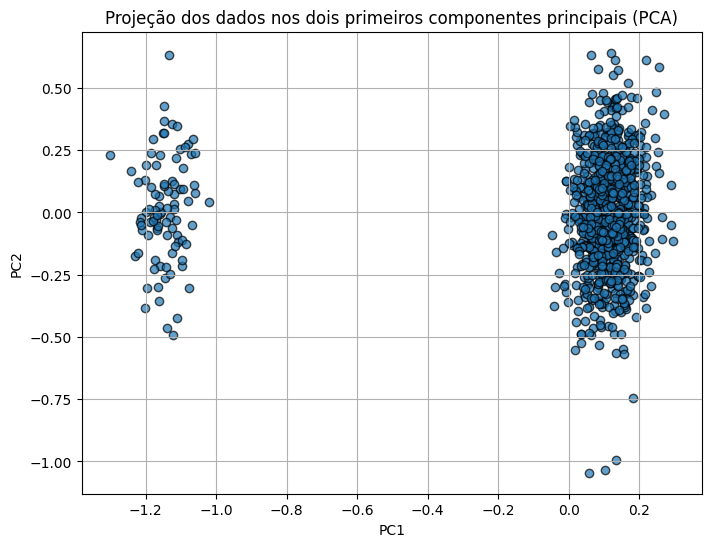

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.7, edgecolors='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projeção dos dados nos dois primeiros componentes principais (PCA)')
plt.grid(True)
plt.show()
